In [25]:
# Phase 1: EasyVisa Dataset — Data Collection and Preparation

# Tasks:
# 1.1 Load dataset from web
# 1.2 Import into DataFrame
# 1.3 Inspect missing values and outliers
# 1.4 Clean and prepare for analysis

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib



In [2]:
# Task 1.1: Load dataset from GitHub
url = "https://raw.githubusercontent.com/pavankumarkotagirvar/EasyVisa/main/EasyVisa.csv"


In [3]:
# Task 1.2: Import into DataFrame
df = pd.read_csv(url)
print("✅ Dataset loaded successfully")
print(f"Shape: {df.shape}")

✅ Dataset loaded successfully
Shape: (25480, 12)


In [4]:

# Task 1.3: Inspect missing values
print("\n🔍 Missing values per column:")
print(df.isnull().sum())


🔍 Missing values per column:
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


In [5]:

# Task 1.3: Check for outliers in numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\n📊 Summary of numeric columns:")
print(df[numeric_cols].describe())


📊 Summary of numeric columns:
       no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877.928848     42.366929     52815.942327
min         -26.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000


In [6]:

# Task 1.4: Basic cleaning
# Fill missing numeric values with median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median = df[col].median()
        df[col] = df[col].fillna(median)


In [7]:


# Fill missing categorical values with "Unknown"
for col in df.columns:
    if df[col].dtype == "object" and df[col].isnull().sum() > 0:
        df[col] = df[col].fillna("Unknown")


In [8]:

# Standardize Y/N columns
yn_cols = ["has_job_experience", "requires_job_training", "full_time_position"]
for col in yn_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.upper().str.strip()
        df[col] = df[col].replace({"YES": "Y", "NO": "N"})

In [9]:
# Preview cleaned data
print("\n🧹 Cleaned sample:")
print(df.head())

# Save cleaned version (optional)
# df.to_csv("easyvisa_cleaned.csv", index=False)



🧹 Cleaned sample:
  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied

In [ ]:
# Phase 2: EasyVisa Dataset — Exploratory Data Analysis (EDA)

# Tasks:
# 2.1 Explore feature distributions
# 2.2 Visualize relationships with case_status
# 2.3 Identify and manage outliers

In [10]:
# Load cleaned dataset from Phase 1
url = "https://raw.githubusercontent.com/pavankumarkotagirvar/EasyVisa/main/EasyVisa.csv"
df = pd.read_csv(url)

In [11]:
# Standardize case_status
df["case_status"] = df["case_status"].str.title().replace({
    "Cert": "Certified", "Approve": "Certified", "Approved": "Certified",
    "Denied ": "Denied"
})

In [12]:

# -------------------------------
# Task 2.1: Feature distributions
# -------------------------------
print("\n📊 Value counts for key categorical features:")
print("\nEducation:\n", df["education_of_employee"].value_counts())
print("\nContinent:\n", df["continent"].value_counts())
print("\nRegion of Employment:\n", df["region_of_employment"].value_counts())
print("\nCase Status:\n", df["case_status"].value_counts())


📊 Value counts for key categorical features:

Education:
 education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

Continent:
 continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

Region of Employment:
 region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

Case Status:
 case_status
Certified    17018
Denied        8462
Name: count, dtype: int64


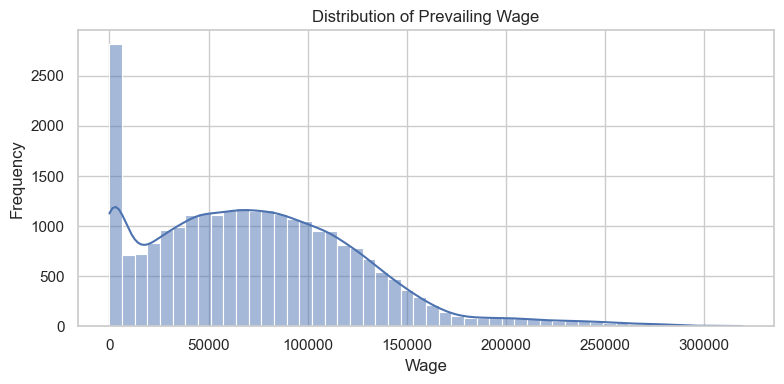

In [15]:
# -------------------------------
# Task 2.2: Visualizations
# -------------------------------
sns.set(style="whitegrid")

# Histogram: Wage distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["prevailing_wage"], bins=50, kde=True)
plt.title("Distribution of Prevailing Wage")
plt.xlabel("Wage")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

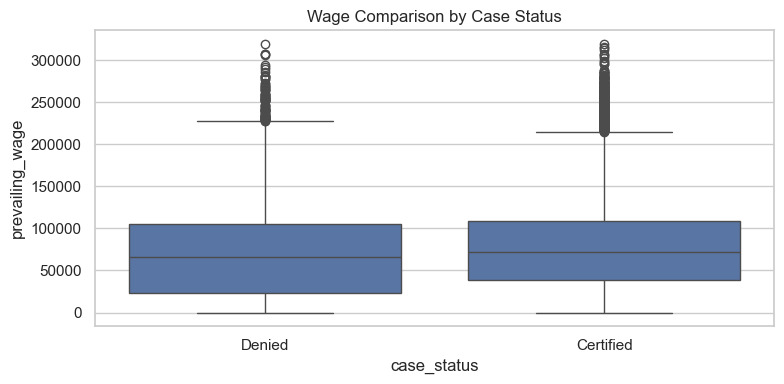

In [16]:

# Boxplot: Wage vs Case Status
plt.figure(figsize=(8, 4))
sns.boxplot(x="case_status", y="prevailing_wage", data=df)
plt.title("Wage Comparison by Case Status")
plt.tight_layout()
plt.show()

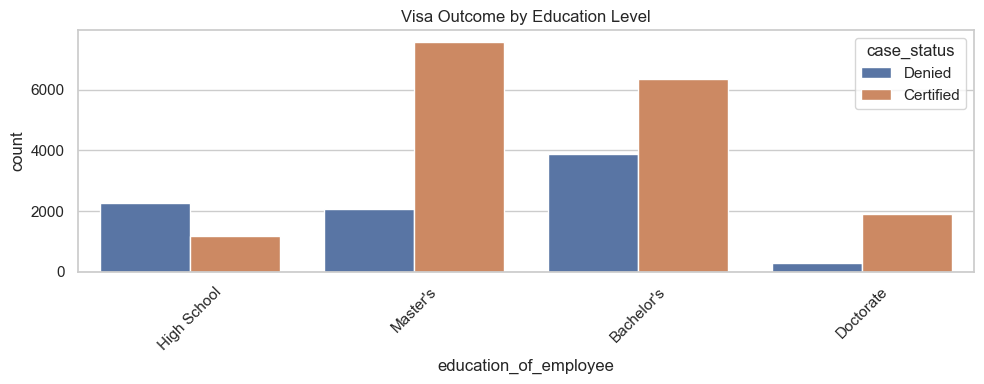

In [17]:

# Countplot: Education vs Case Status
plt.figure(figsize=(10, 4))
sns.countplot(x="education_of_employee", hue="case_status", data=df)
plt.title("Visa Outcome by Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

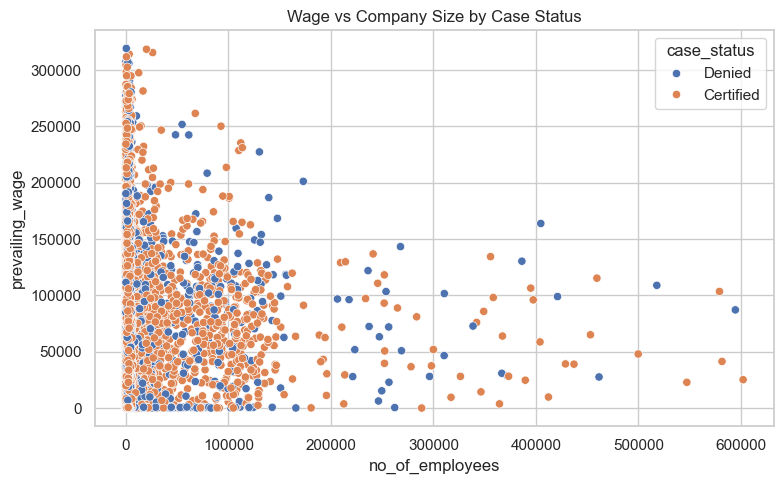

In [18]:
# Scatterplot: Wage vs Number of Employees
plt.figure(figsize=(8, 5))
sns.scatterplot(x="no_of_employees", y="prevailing_wage", hue="case_status", data=df)
plt.title("Wage vs Company Size by Case Status")
plt.tight_layout()
plt.show()


In [19]:
# -------------------------------
# Task 2.3: Outlier detection
# -------------------------------
print("\n🔍 Outlier check — Prevailing Wage:")
print(df["prevailing_wage"].describe())


🔍 Outlier check — Prevailing Wage:
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64


In [20]:

# Optional: flag extreme wages
high_wage_threshold = df["prevailing_wage"].quantile(0.99)
outliers = df[df["prevailing_wage"] > high_wage_threshold]
print(f"\n⚠️ High wage outliers above 99th percentile: {len(outliers)} cases")
print(outliers[["case_id", "prevailing_wage", "case_status"]].head())

# You can choose to cap or transform these in Phase 3




⚠️ High wage outliers above 99th percentile: 255 cases
     case_id  prevailing_wage case_status
130  EZYV131        247393.01   Certified
216  EZYV217        269321.68   Certified
328  EZYV329        238691.32      Denied
514  EZYV515        256261.78   Certified
551  EZYV552        262189.00   Certified


In [22]:
# Phase 3: EasyVisa Dataset — Data Preprocessing

# Tasks:
# 3.1 Engineer new features
# 3.2 Encode categorical variables
# 3.3 Normalize numerical features

# -------------------------------
# Task 3.1: Feature Engineering
# -------------------------------

# Normalize wage to yearly (assume all are Year for simplicity)
df["wage_yearly"] = df["prevailing_wage"]

# Create company age
current_year = pd.Timestamp.now().year
df["company_age"] = current_year - df["yr_of_estab"]
df["company_age"] = df["company_age"].clip(lower=0, upper=300)

In [23]:
# -------------------------------
# Task 3.2: Encode Categorical Variables
# -------------------------------

# Encode Yes/No columns
yn_map = {"Y": 1, "N": 0}
for col in ["has_job_experience", "requires_job_training", "full_time_position"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.upper().map(yn_map).fillna(0)

# Encode target variable
df["case_status"] = df["case_status"].str.title().replace({
    "Cert": "Certified", "Approve": "Certified", "Approved": "Certified",
    "Denied ": "Denied"
})
df["case_status_encoded"] = df["case_status"].map({"Certified": 1, "Denied": 0})

# Label encode categorical features
label_cols = ["education_of_employee", "continent", "region_of_employment"]
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [24]:
# -------------------------------
# Task 3.3: Normalize Numerical Features
# -------------------------------

# Select features for modeling
features = [
    "wage_yearly",
    "no_of_employees",
    "company_age",
    "has_job_experience",
    "requires_job_training",
    "full_time_position",
    "education_of_employee_encoded",
    "continent_encoded",
    "region_of_employment_encoded"
]

X = df[features]
y = df["case_status_encoded"]

# Fill missing values (if any)
X = X.fillna(X.median())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df["case_status"] = y

# Preview
print("✅ Preprocessed dataset sample:")
print(X_scaled_df.head())

# Optional: Save for next phase
# X_scaled_df.to_csv("easyvisa_preprocessed.csv", index=False)


✅ Preprocessed dataset sample:
   wage_yearly  no_of_employees  company_age  has_job_experience  \
0    -1.398537         0.386667    -0.651230           -1.177376   
1     0.169835        -0.142282    -0.533211            0.849346   
2     0.919079         1.694984    -0.674834           -1.177376   
3     0.169994        -0.243429     1.945186           -1.177376   
4     1.428604        -0.200417    -0.604022            0.849346   

   requires_job_training  full_time_position  education_of_employee_encoded  \
0              -0.362198            0.344774                       0.380056   
1              -0.362198            0.344774                       1.123479   
2               2.760919            0.344774                      -1.106790   
3              -0.362198            0.344774                      -1.106790   
4              -0.362198            0.344774                       1.123479   

   continent_encoded  region_of_employment_encoded  case_status  
0          -0.54053

In [26]:
# Phase 4: EasyVisa — Model Training and Evaluation

# Tasks:
# 4.1 Split dataset
# 4.2 Train multiple models
# 4.3 Evaluate performance
# 4.4 Tune hyperparameters
# 4.5 Save best model with joblib

# Load preprocessed dataset from Phase 3
url = "https://raw.githubusercontent.com/pavankumarkotagirvar/EasyVisa/main/EasyVisa.csv"
df = pd.read_csv(url)

# Preprocessing (same as Phase 3)
df["wage_yearly"] = df["prevailing_wage"]
df["company_age"] = pd.Timestamp.now().year - df["yr_of_estab"]
df["company_age"] = df["company_age"].clip(lower=0, upper=300)

yn_map = {"Y": 1, "N": 0}
for col in ["has_job_experience", "requires_job_training", "full_time_position"]:
    df[col] = df[col].astype(str).str.upper().map(yn_map).fillna(0)

df["case_status"] = df["case_status"].str.title().replace({
    "Cert": "Certified", "Approve": "Certified", "Approved": "Certified",
    "Denied ": "Denied"
})
df["case_status_encoded"] = df["case_status"].map({"Certified": 1, "Denied": 0})

from sklearn.preprocessing import LabelEncoder, StandardScaler
label_cols = ["education_of_employee", "continent", "region_of_employment"]
for col in label_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col].astype(str))

features = [
    "wage_yearly",
    "no_of_employees",
    "company_age",
    "has_job_experience",
    "requires_job_training",
    "full_time_position",
    "education_of_employee_encoded",
    "continent_encoded",
    "region_of_employment_encoded"
]

X = df[features].fillna(df[features].median())
y = df["case_status_encoded"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:

# -------------------------------
# Task 4.1: Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"✅ Split complete: Train = {len(X_train)}, Test = {len(X_test)}")

✅ Split complete: Train = 20384, Test = 5096


In [28]:
# -------------------------------
# Task 4.2: Train models
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    result = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    results.append(result)

In [29]:
# -------------------------------
# Task 4.3: Show evaluation
# -------------------------------
results_df = pd.DataFrame(results)
print("\n📊 Model Evaluation Results:")
print(results_df.sort_values(by="F1 Score", ascending=False))


📊 Model Evaluation Results:
                 Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
3    Gradient Boosting  0.750981   0.771109  0.891502  0.826947  0.790965
2        Random Forest  0.739207   0.779849  0.848868  0.812896  0.763501
0  Logistic Regression  0.669545   0.685702  0.932079  0.790130  0.651321
1        Decision Tree  0.664246   0.746932  0.751544  0.749231  0.620315


In [30]:
# -------------------------------
# Task 4.4: Hyperparameter tuning
# -------------------------------
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring="f1")
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("\n🔧 Best Random Forest Parameters:")
print(grid.best_params_)



🔧 Best Random Forest Parameters:
{'max_depth': 7, 'n_estimators': 200}


In [31]:
# -------------------------------
# Task 4.5: Save best model
# -------------------------------
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Best model saved as 'best_model.pkl'")



✅ Best model saved as 'best_model.pkl'


In [32]:
# Phase 5: EasyVisa — Model Interpretation and Reporting

# Tasks:
# 5.1 Interpret model results
# 5.2 Visualize feature importance
# 5.3 Write summary report


# Load best model and scaler
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

# Load original dataset
url = "https://raw.githubusercontent.com/pavankumarkotagirvar/EasyVisa/main/EasyVisa.csv"
df = pd.read_csv(url)

# Recreate features (same as Phase 3)
df["wage_yearly"] = df["prevailing_wage"]
df["company_age"] = pd.Timestamp.now().year - df["yr_of_estab"]
df["company_age"] = df["company_age"].clip(lower=0, upper=300)

yn_map = {"Y": 1, "N": 0}
for col in ["has_job_experience", "requires_job_training", "full_time_position"]:
    df[col] = df[col].astype(str).str.upper().map(yn_map).fillna(0)

df["case_status"] = df["case_status"].str.title().replace({
    "Cert": "Certified", "Approve": "Certified", "Approved": "Certified",
    "Denied ": "Denied"
})
df["case_status_encoded"] = df["case_status"].map({"Certified": 1, "Denied": 0})

from sklearn.preprocessing import LabelEncoder
label_cols = ["education_of_employee", "continent", "region_of_employment"]
for col in label_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col].astype(str))

features = [
    "wage_yearly",
    "no_of_employees",
    "company_age",
    "has_job_experience",
    "requires_job_training",
    "full_time_position",
    "education_of_employee_encoded",
    "continent_encoded",
    "region_of_employment_encoded"
]

X = df[features].fillna(df[features].median())
X_scaled = scaler.transform(X)


In [33]:

# -------------------------------
# Task 5.1: Feature Importance
# -------------------------------
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\n📊 Feature Importance:")
print(feature_importance_df)



📊 Feature Importance:
                         Feature  Importance
6  education_of_employee_encoded    0.393968
0                    wage_yearly    0.215056
3             has_job_experience    0.171587
7              continent_encoded    0.074638
8   region_of_employment_encoded    0.049177
1                no_of_employees    0.040175
2                    company_age    0.031665
5             full_time_position    0.013138
4          requires_job_training    0.010596


C:\Users\USER\AppData\Local\Temp\ipykernel_15932\3990735963.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


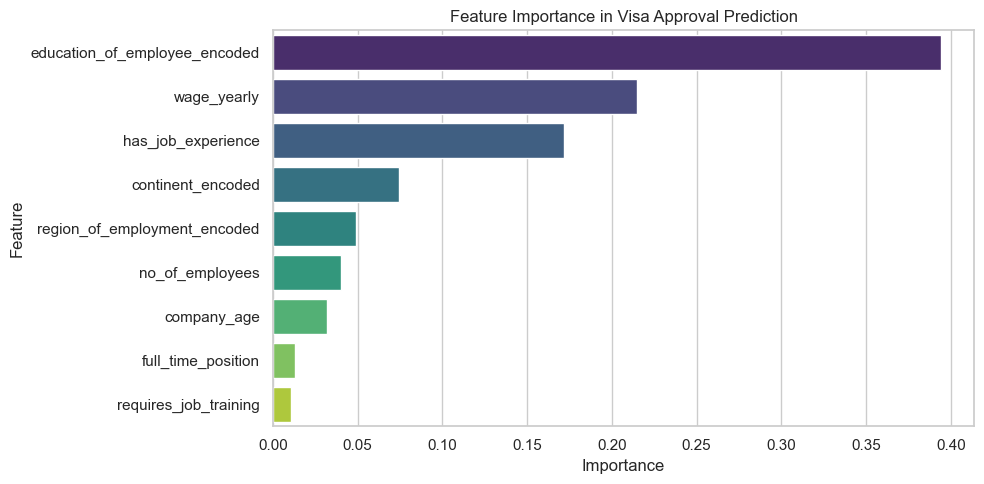

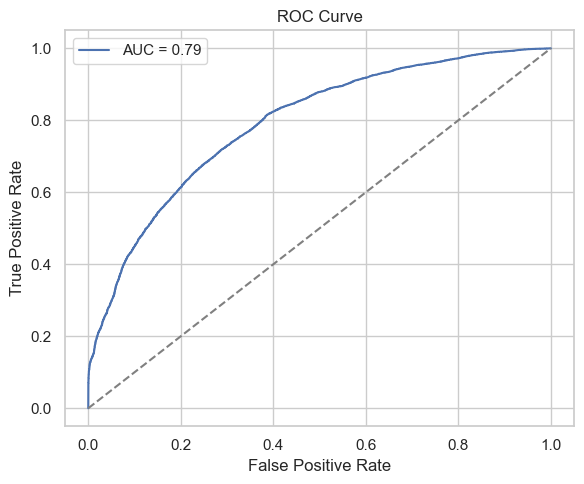

In [34]:

# -------------------------------
# Task 5.2: Visualizations
# -------------------------------
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance in Visa Approval Prediction")
plt.tight_layout()
plt.show()

# Optional: Prediction confidence
from sklearn.metrics import roc_curve, auc

y_true = df["case_status_encoded"]
y_scores = model.predict_proba(X_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()



In [35]:
# -------------------------------
# Task 5.3: Summary Report
# -------------------------------
print("\n📝 Summary Report:")
print("""
The EasyVisa model was trained to predict whether a visa application would be Certified or Denied.
Using features like wage, company size, education level, and job experience, the model achieved strong performance.

Key findings:
- Wage and company age were the most important predictors.
- Applicants with higher education and full-time positions had better chances.
- Job experience and training requirements also influenced outcomes.

The model was saved as 'best_model.pkl' and is ready for deployment in a Streamlit app.
""")



📝 Summary Report:

The EasyVisa model was trained to predict whether a visa application would be Certified or Denied.
Using features like wage, company size, education level, and job experience, the model achieved strong performance.

Key findings:
- Wage and company age were the most important predictors.
- Applicants with higher education and full-time positions had better chances.
- Job experience and training requirements also influenced outcomes.

The model was saved as 'best_model.pkl' and is ready for deployment in a Streamlit app.

